# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
#city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")

#city = cities[0]

#url = "http://api.openweathermap.org/data/2.5/weather?"

# city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")

# city_weather = requests.get(city_url).json()

# print(city_weather)

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
url = f"{url}units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
counter = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Wait for 1 minute and 10 seconds after every 59th record
    counter += 1
    if counter == 59:
        time.sleep(70)
        counter = 0
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | puerto asis
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | sheridan
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | bealanana
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | newport
Processing Reco

Processing Record 37 of Set 4 | turukhansk
Processing Record 38 of Set 4 | qaqortoq
Processing Record 39 of Set 4 | chicla
Processing Record 40 of Set 4 | virginia beach
Processing Record 41 of Set 4 | casino
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | phalombe
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | asahikawa
Processing Record 46 of Set 4 | cabedelo
Processing Record 47 of Set 4 | jamestown
Processing Record 48 of Set 4 | vilhena
Processing Record 49 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 0 of Set 5 | nueve de julio
Processing Record 1 of Set 5 | garachine
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | leningradskiy
Processing Record 5 of Set 5 | saumur
Processing Record 6 of Set 5 | corpus christi
Processing Record 7 of Set 5 | whitehorse
Processing Record 8 of Set 5 | dikson
Processing Record 9 of Set 5 | saint-philippe
Pro

Processing Record 28 of Set 8 | zhaoqing
Processing Record 29 of Set 8 | vastervik
City not found. Skipping...
Processing Record 30 of Set 8 | hualmay
Processing Record 31 of Set 8 | puerto escondido
Processing Record 32 of Set 8 | dryden
Processing Record 33 of Set 8 | romny
Processing Record 34 of Set 8 | meilu
City not found. Skipping...
Processing Record 35 of Set 8 | la ronge
Processing Record 36 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 37 of Set 8 | lancut
Processing Record 38 of Set 8 | sobolevo
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | wanning
Processing Record 42 of Set 8 | yambio
Processing Record 43 of Set 8 | mazyr
Processing Record 44 of Set 8 | antas
Processing Record 45 of Set 8 | alcains
Processing Record 46 of Set 8 | tilichiki
Processing Record 47 of Set 8 | kargasok
Processing Record 48 of Set 8 | pangnirtung
Processing Record 49 of Set 8 | huaihua
Processing Record 

Processing Record 16 of Set 12 | kalmunai
Processing Record 17 of Set 12 | bolshaya rechka
Processing Record 18 of Set 12 | northfield
Processing Record 19 of Set 12 | miles city
Processing Record 20 of Set 12 | sault sainte marie
Processing Record 21 of Set 12 | luoyang
Processing Record 22 of Set 12 | sturgis
Processing Record 23 of Set 12 | lima
Processing Record 24 of Set 12 | high level
Processing Record 25 of Set 12 | mitchell
Processing Record 26 of Set 12 | santa rosa
Processing Record 27 of Set 12 | makasar
Processing Record 28 of Set 12 | lebedinyy
Processing Record 29 of Set 12 | alice
Processing Record 30 of Set 12 | ipswich
Processing Record 31 of Set 12 | dedza
Processing Record 32 of Set 12 | naftah
City not found. Skipping...
Processing Record 33 of Set 12 | palmer
Processing Record 34 of Set 12 | okhotsk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,upernavik,72.7868,-56.1549,-27.61,90,81,3.04,GL,1679894426
1,kaitangata,-46.2817,169.8464,17.47,56,84,5.82,NZ,1679894466
2,yellowknife,62.4560,-114.3525,-23.71,70,0,1.54,CA,1679894375
3,puerto asis,0.5133,-76.5007,20.59,96,73,0.20,CO,1679894467
4,vaini,-21.2000,-175.2000,27.09,94,75,2.57,TO,1679894467


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-27.61,90,81,3.04,GL,1679894426
1,kaitangata,-46.2817,169.8464,17.47,56,84,5.82,NZ,1679894466
2,yellowknife,62.4560,-114.3525,-23.71,70,0,1.54,CA,1679894375
3,puerto asis,0.5133,-76.5007,20.59,96,73,0.20,CO,1679894467
4,vaini,-21.2000,-175.2000,27.09,94,75,2.57,TO,1679894467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

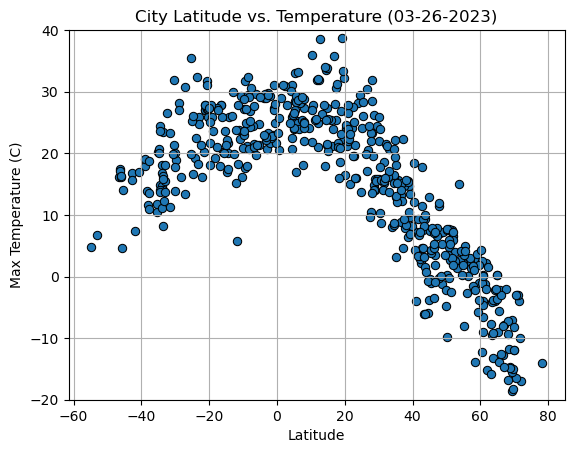

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=.75, marker="o")
plt.title("City Latitude vs. Temperature (03-26-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.ylim(-20, 40)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

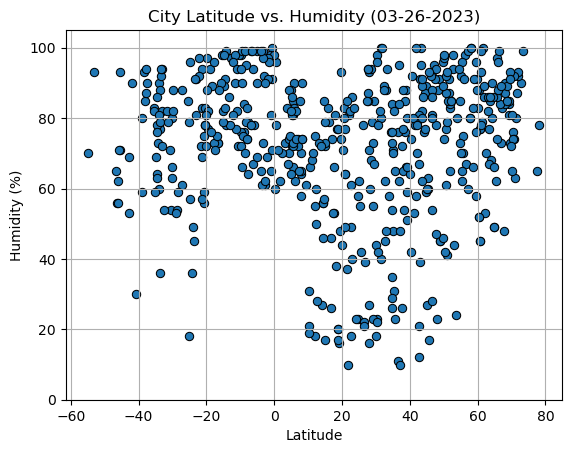

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=.75, marker="o")
plt.title("City Latitude vs. Humidity (03-26-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
plt.ylim(0, 105)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

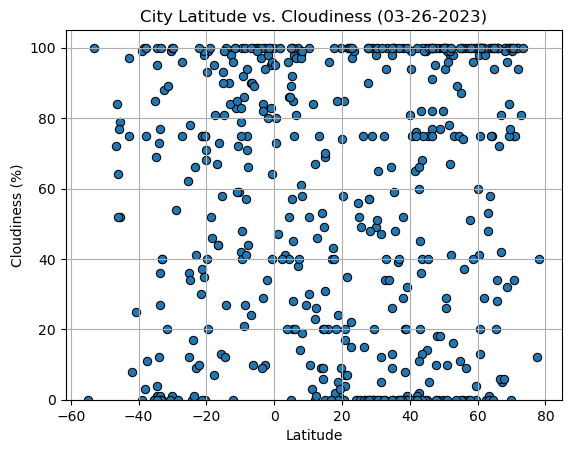

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=.75, marker="o")
plt.title("City Latitude vs. Cloudiness (03-26-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.ylim(0, 105)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

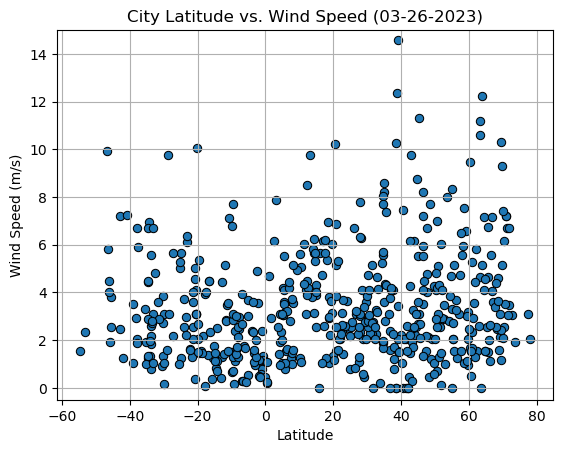

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=.75, marker="o")
plt.title("City Latitude vs. Wind Speed (03-26-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.ylim(-.5, 15)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue}")

    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-27.61,90,81,3.04,GL,1679894426
2,yellowknife,62.4560,-114.3525,-23.71,70,0,1.54,CA,1679894375
3,puerto asis,0.5133,-76.5007,20.59,96,73,0.20,CO,1679894467
6,sheridan,44.8333,-106.9173,-3.79,89,100,8.75,US,1679894468
7,butaritari,3.0707,172.7902,27.80,73,41,7.88,KI,1679894469


In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,upernavik,72.7868,-56.1549,-27.61,90,81,3.04,GL,1679894426
2,yellowknife,62.4560,-114.3525,-23.71,70,0,1.54,CA,1679894375
3,puerto asis,0.5133,-76.5007,20.59,96,73,0.20,CO,1679894467
6,sheridan,44.8333,-106.9173,-3.79,89,100,8.75,US,1679894468
7,butaritari,3.0707,172.7902,27.80,73,41,7.88,KI,1679894469


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaitangata,-46.2817,169.8464,17.47,56,84,5.82,NZ,1679894466
4,vaini,-21.2000,-175.2000,27.09,94,75,2.57,TO,1679894467
5,bluff,-46.6000,168.3333,16.12,65,72,9.91,NZ,1679894467
8,bealanana,-14.5500,48.7333,20.09,91,99,0.83,MG,1679894470
11,castro,-24.7911,-50.0119,16.67,96,78,1.23,BR,1679894471


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9047544963793233


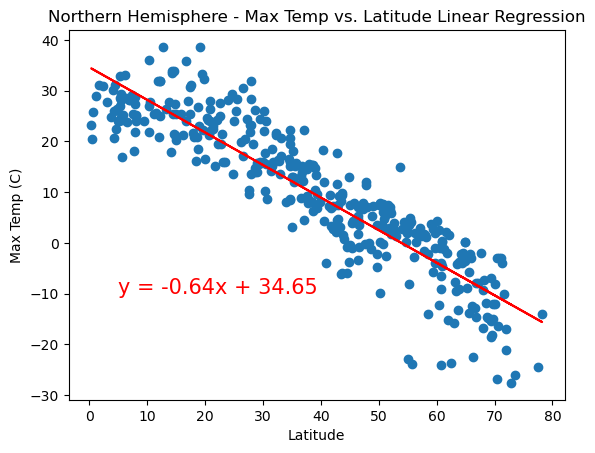

In [57]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
y_label = 'Max Temp (C)'

plot_linear_regression(x_values, y_values, title, y_label, (5, -10))

The r-value is: 0.5854955806615547


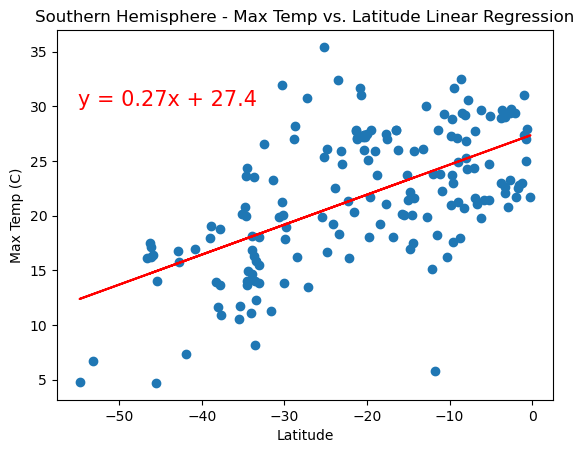

In [59]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
y_label = 'Max Temp (C)'

plot_linear_regression(x_values, y_values, title, y_label, (-55, 30))

**Discussion about the linear relationship:** It is clear that max temperature decreases as latitude increases in the Northern Hemisphere, and max temperature increases as latitude increases in the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2693178778446181


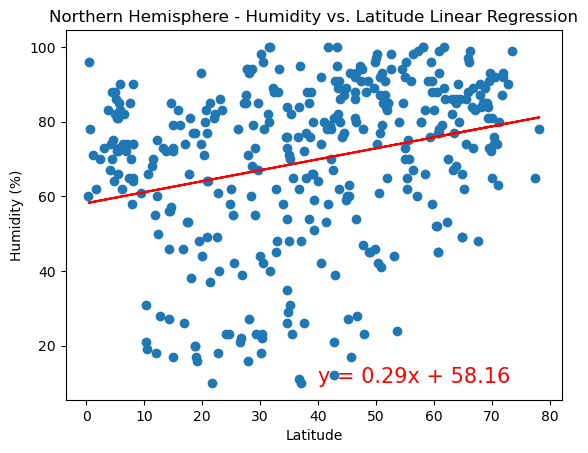

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = 'Northern Hemisphere - Humidity vs. Latitude Linear Regression'
y_label = 'Humidity (%)'

plot_linear_regression(x_values, y_values, title, y_label, (40, 10))

The r-value is: 0.30215078576949617


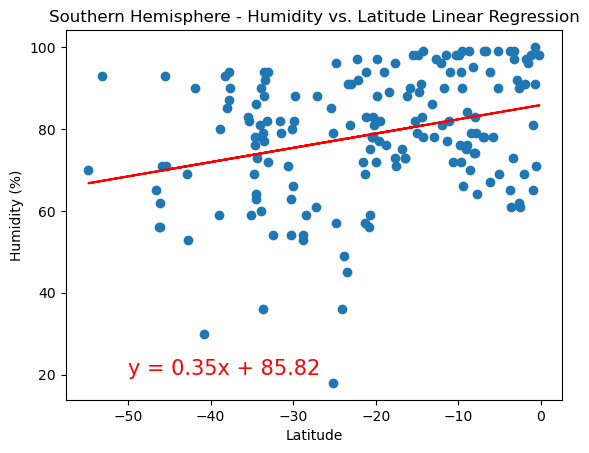

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = 'Southern Hemisphere - Humidity vs. Latitude Linear Regression'
y_label = 'Humidity (%)'

plot_linear_regression(x_values, y_values, title, y_label, (-50, 20))

**Discussion about the linear relationship:** It seems to be that there is a slight increase in humidty as latitude increases in both Hemispheres; however, this very slim increase is almost irrelevant due to the fact that the data shows there could be high or low humidty at any latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1749201310731016


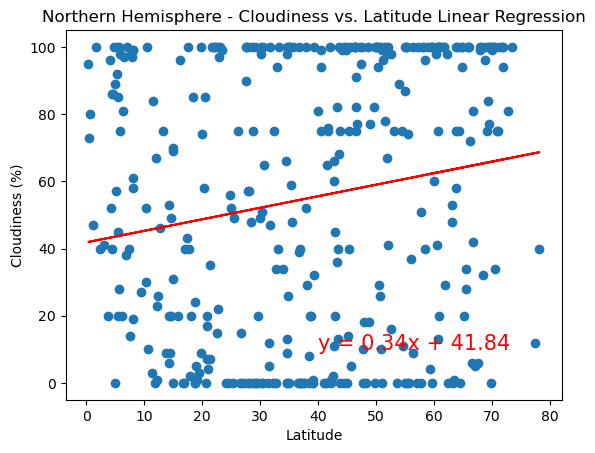

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression'
y_label = 'Cloudiness (%)'

plot_linear_regression(x_values, y_values, title, y_label, (40, 10))

The r-value is: 0.2942127514723374


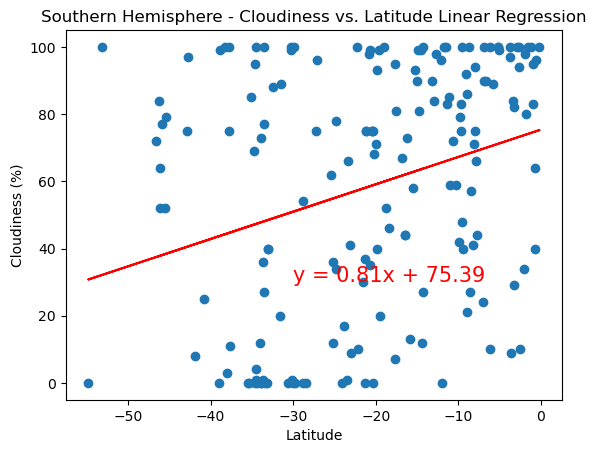

In [67]:
# Sorthern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression'
y_label = 'Cloudiness (%)'

plot_linear_regression(x_values, y_values, title, y_label, (-30, 30))

**Discussion about the linear relationship:** Like the humidity measure, it seems to be that there is a slight increase in cloudiness as latitude increases in the Northern Hemisphere, but this is more exagerrated in the Southern Hemisphere; however, the correlation is not obviously clear without a line showing as much, so this data should not be taken as highly reliable when drawing conclusions about the correlation of cloudiness to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09183198512804472


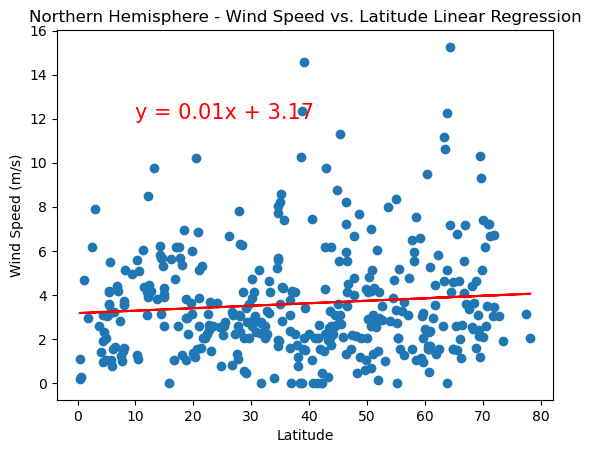

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression'
y_label = 'Wind Speed (m/s)'

plot_linear_regression(x_values, y_values, title, y_label, (10, 12))

The r-value is: -0.3012996277425815


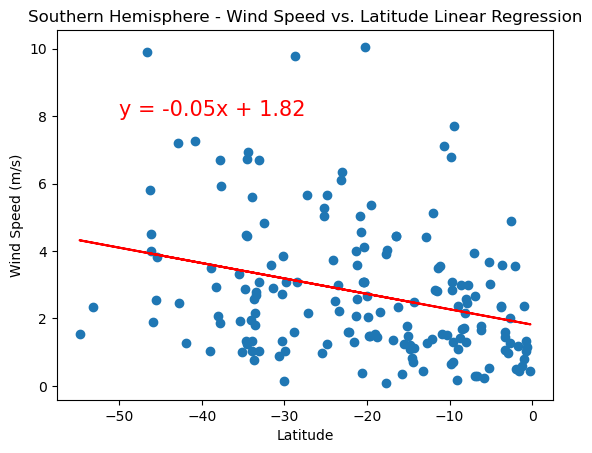

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression'
y_label = 'Wind Speed (m/s)'

plot_linear_regression(x_values, y_values, title, y_label, (-50, 8))

**Discussion about the linear relationship:** In the Northern Hemisphere, there seems to be no correlation between wind speed and latitude. In the Southern Hemishpere, it looks like wind speed decreases slightly as latitude increases, but the correlation is not obviouly clear without a line shwoing as much, so maybe it should not be taken as highly reliable. 